Objetivo: Realizar todos los pasos dentro del proceso de preprocesamiento de datos sobre el conjunto de datos de Hotel Booking. El conjunto de datos contiene información sobre reservas de hotel realizadas en dos hoteles, uno en ciudad y otro un resort.
Cada fila consiste en una reserva del hotel.
Incluye información sobre cuando fue realizada.
La duración de la estadía.
El número de adultos, niños y bebés entre otras cosas.
Este conjunto de datos es ideal para practicar el análisis exploratorio de los datos y los conceptos de limpieza y calidad de los datos.

**Paso 1. Importamos las librerías:**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler

**Paso 2. Cargamos los datos:**
El conjunto de datos se encuentran en formato CSV (valores separados por comas).
Existen diferentes formas de cargar el conjunto de datos, se puede cargar desde una dirección URL o desde nuestro google drive.

In [ ]:
#drive.mount('/content/drive')
#csv_path = "/content/drive/MyDrive/hotel_bookings.csv"
#df = pd.read_csv(csv_path)
df = pd.read_csv('hotel_bookings.csv')
df.head()

**Paso 3. Conociendo los datos:**
Para comenzar a conocer los datos podemos utilizar dos métodos que nos ayudaran a obtener un vistazo rápido del conjunto de datos, se utilizan los comandos:

dataframe.shape indica el número de filas y columnas.
dataframe.info indica el número de filas, columnas y el nombre de las columnas, cuenta el número de nulos y muestra de tipo de dato de cada columna y su cantidad.

In [ ]:
df.shape

In [ ]:
df.info()

**Paso 4. Identificar los tipos de datos:**
Exploramos los tipos de datos de cada columna. Así mismo, identificaremos si hay alguna columna que según su significado no coincida con su tipo de dato:

La función dtypes genera una tabla con el tipo de dato de cada columna

In [ ]:
df.dtypes

Observamos que si hay columnas que según su significado no coincide con su tipo de dato, como por ejemplo, la columna children, presenta como tipo de dato float, sin embargo, debería de ser int. De igual manera con la columna, reservation_status_date, debería de ser datetime64


**Paso 5. Identificar datos faltantes:**
Para identificar los datos faltantes en el conjunto de datos se puede utilizar la función isnull y sumar los valores:

In [ ]:
print(df.isnull().sum())

Observamos que la columna company presenta más del 50% de datos faltantes.

**Paso 6. Identificar datos atípicos:**
Para identificar datos atípicos se pueden utilizar distintos métodos, Utilicemos un gráfico de box plot para graficar una de las variables:

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df["stays_in_weekend_nights"])
plt.show()

Observamos que la mayoría de huespedes se quedan hasta cinco noches de fin de semana.
➡️ También se pueden analizar los datos utilizando alguna variable categórica, por ejemplo, las reservas canceladas o no canceladas y vincularlo a una variable numérica como las noches de fin de semana:

In [ ]:
fig = plt.figure(figsize=(8,9))
sns.boxplot(x="is_canceled", y="stays_in_weekend_nights", data=df)

**Paso 7. Calcular las estadísticas:**
dataframe.describe para visualizar las estadísticas del conjunto de datos. Por defecto, la función describe trabaja con columnas numéricas y no con columnas de tipo object, mostrando los siguientes datos:

El número de elementos de la variable
La media
La desviación estándar (std)
El valor mínimo
Los cuartiles
El valor máximo

In [ ]:
df.describe()

➡️ Ahora visualizamos a las variables categóricas: agregándole include=['object'] podremos observar solo las columnas que son categóricas (de tipo object):

In [ ]:
df.describe(include=['object'])

unique: para saber cuantos valores son únicos, como podemos ver en la columna hotel hay 2 valores diferentes.
top: para ver el valor que más se repite, el cual es City Hotel.
freq: la frecuencia en que se repide el valor City Hotel.

**Paso 8. Análisis de tendencia central, posición y dispersión:** 🎯
El análisis de la tendencia central, la simetría y la dispersión de los datos es importante para entender cómo se comporta cada variable:

➡️ lead_time: número de días entre hecha la reserva y el día de llegada al hotel.

In [ ]:
df['lead_time'].hist(figsize = (6,6))
plt.show

Este gráfico muestra un sesgo positivo hacia la derecha

In [ ]:
mean = df['lead_time'].mean()
median = df['lead_time'].median()
mode = df['lead_time'].mode()
skew = df['lead_time'].skew()
kurt = df['lead_time'].kurt()

print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

➡️ arrival_date_week_number: número de la semana del año en que llega el huesped al hotel.

In [ ]:
df['arrival_date_week_number'].hist(figsize = (6,6))
plt.show

In [ ]:
mean = df['arrival_date_week_number'].mean()
median = df['arrival_date_week_number'].median()
mode = df['arrival_date_week_number'].mode()
skew = df['arrival_date_week_number'].skew()
kurt = df['arrival_date_week_number'].kurt()

print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

**Paso 9. Contando datos duplicados:**
Para ver los datos duplicados del conjunto de datos llamamos al método duplicated() en el DataFrame. Si luego llamamos al método SUM, obtendremos el total de duplicados:

In [ ]:
df.duplicated().sum()

Observamos que existen 31994 filas con los mismos datos

**Paso 10. Exploración y visualización de los datos:**
Utilizando tecnicas de visualización se puede comenzar a comprender el contexto alrededor de los datos, se van a realizar diferentes preguntas capaces de brindar información interesante.

Estas preguntas nos ayudan a encontrar análisis significativos sin siquiera aplicar alguna técnica de analítica.
Se comprende mejor el mundo de las reservas de hoteles, así como las necesidades que les pueden surgir a las empresas y que se tratan de solucionar con herramientas analíticas.
Empezaremos a analizar las variables numéricas y luego las categóricas.

**10.1. Análisis de variables numéricas:**
Explorando las variables numéricas observamos su distribución. Se puede utilizar el diagrama de hist para visualizar todos los histogramas de las variables numéricas dentro del dataframe:

In [ ]:
df.hist(figsize=(20,15))

➡️ También se puede analizar cada variable de manera independiente. En este gráfico se muestra el histograma de la variable arrival_Date_week_number que muestra las diferentes semanas del año 1-52, donde los clientes reservan o se hospedan en los hoteles:



In [ ]:
df['arrival_date_week_number'].hist(figsize = (6,6))
plt.xlabel('arrival_date_week_number')
plt.ylabel('Cantidad')
plt.title('Histograma arrival_date_week_number', fontweight = "bold")
plt.show

➡️ En este histograma se aprecia la distribución de la variable adr (tarifa diaria promedio):

In [ ]:
df['adr'].hist(figsize = (6,6))
plt.xlabel('Average Daily Rate')
plt.ylabel('Cantidad')
plt.title('Histograma adr', fontweight = "bold")
plt.show

➡️ Para visualizar la relación entre dos variables numéricas se utiliza un gráfico de líneas. Este combina las variables de mes de llegada arrival_date_month y tarifa promedio adr. Como tenemos variables que representan tiempo (años, meses, semanas, fecha) se puede realizar un análisis en el tiempo para ver su comportamiento. La temporada alta es junio, julio, agosto y la temporada baja es noviembre, diciembre y enero:

In [ ]:
fig = plt.figure(figsize=(7,4), dpi=100)
plt.xticks(rotation = 45, fontsize=10)
sns.lineplot(data=df, x = 'arrival_date_month', y = 'adr')

➡️ Ahora hacemos lo mismo, pero con el número de semana del año arrival_date_week_number:

Vemos que el gráfico coincide, ya que el número de semana coincide con el mes del año.

In [ ]:
fig = plt.figure(figsize=(7,4), dpi=100)
plt.xticks(rotation = 45, fontsize=10)
sns.lineplot(data=df, x = 'arrival_date_week_number', y = 'adr')

**10.2. Análisis de variables categóricas:**
Para analizar las variables categóricas, seleccionamos primero el subconjunto del dataframe y visualizamos los valores de cada categoría. Identificamos algún valor que no corresponda con el negocio.

Seleccionar las variables categóricas:

In [ ]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

La columna reservation_status_date se muestra como tipo de dato categórico, sin embargo, debería de ser datetime64 más adelante se hará el cambio.
➡️ Visualizar los valores de cada una de las variables:

Esto nos ayuda a identificar valores que no coinciden con el dominio del negocio, de ser así, lo eliminaríamos.

In [ ]:
for col in df_cat.columns:
  print(f"{col}: \n{df_cat[col].unique()}\n")

➡️ Ahora, utilizando gráficos se observa la proporción entre las distintas categorías.

Gráfico que muestra a la variable si la reserva fue cancelada o no:


In [ ]:
sns.countplot(data=df, x = 'is_canceled')
plt.show()

➡️ Inclinación de los clientes por los distintos tipos de habitación:



In [ ]:
sns.countplot(data=df, x = 'reserved_room_type')
plt.show()

Observamos que el tipo de habitación A es la que más se ha reservado.
➡️ Por dónde se realizaron las reservas:

In [ ]:
sns.countplot(data=df, x= 'market_segment')
plt.xticks(rotation=45, fontsize=10)

Observamos que la mayoría de reservas se hicieron por Online TA.
➡️ Análisis de las reservas que no fueron canceladas, según el segmento del mercado:

In [ ]:
#Separamos los grupos por tipo de hotel y solo con reservas no canceladas:
rh = pd.DataFrame(df.loc[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)])
ch = pd.DataFrame(df.loc[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)])

#Ajustamos tamaño de la figura:
fig = plt.figure(figsize = (16, 9))

#Pie de Resort Hotel:
ax = fig.add_subplot(121)
rh_segment_pie = pd.DataFrame(rh['market_segment'].value_counts())
ax.set_title('The Market segment of Resort Hotel', fontsize = 14)
# rh_segment_pie['market_segment'] does not exist, it is actually in the index
# Use rh_segment_pie['count'] instead to access the values for the pie chart
# and rh_segment_pie.index to access the labels
ax.pie(x = rh_segment_pie['count'], labels = rh_segment_pie.index, autopct = '%.3f%%')

#Pie de City Hotel:
ax = fig.add_subplot(122)
ch_segment_pie = pd.DataFrame(ch['market_segment'].value_counts())
ax.set_title('The Market segment of City Hotel', fontsize = 14)
# Similarly, use ch_segment_pie['count'] for the values and ch_segment_pie.index for the labels
ax.pie(x = ch_segment_pie['count'], labels = ch_segment_pie.index, autopct = '%.3f%%')

**Paso 11. Combinando variables:**
Después de analizar las variables de manera individual para comprender su comportamiento, se pueden encontrar relaciones interesantes entres dos, tres o cuatro variables. A continuación se responden algunas preguntas interesantes:

➡️ ¿Qué tipo de hotel tiene el mayor número de cancelaciones?

In [ ]:
sns.countplot(data=df, x = 'hotel', hue='is_canceled')
plt.show()

➡️ ¿Cuáles son los paises más visitados?

In [ ]:
paises_mas_visitas = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
paises_mas_visitas.columns = ['country', 'No of guests']
paises_mas_visitas

➡️ Mapa para visualizar los paises anteriores y la cantidad de visitantes:

In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(
    paises_mas_visitas,
    locations = paises_mas_visitas['country'],
    color_continuous_scale="portland",
    color = paises_mas_visitas['No of guests'],
    hover_name = paises_mas_visitas['country']
)

guests_map.show()

➡️ ¿Cuánto se paga por una noche de alojamiento?

In [ ]:
# Filtramos las reservas no canceladas
cuanto_se_paga = df[df['is_canceled'] == 0]
plt. figure (figsize= (12,8))

sns.boxplot(x='reserved_room_type', y='adr', data=cuanto_se_paga, hue='hotel')
plt.title('Precio por tipo de habitación por noche', fontsize=16)
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio en [EUR]')
plt.show()

➡️ ¿Existe alguna relación entre el número de días transcurridos desde la reserva y las cancelaciones?

lead_time: num días transcurridos entre la fecha de reserva y el dia de llegada al hotel.

In [ ]:
plt.figure(figsize= (12, 6))
sns.barplot(x='arrival_date_year', y='lead_time', hue='is_canceled', data = df)
plt.title ('Alo de llegada, Anticipo y Cancelaciones')

➡️ ¿Se distribuyen de forma homogénea las llegadas dependiendo del mes?

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(data = df, x = 'arrival_date_day_of_month', hue = 'hotel')
plt.show()

Se concluye que se distribuyen de forma razonablemente homogenea. El valor más bajo se registra los días 31, esto se debe a que no todos los meses tienen 31 días y por tanto el recuento de llegadas es inferior.
➡️ ¿Qué tipo de régimen de pensión eligen los huéspedes?

SC: No meal
BB: Bed and Breakfast
HB: Half board
FB: Full board (pensión completa)
Undefined: No definido el régimen de comida

In [ ]:
meal_labels = ['BB','B', 'SC', 'Sin definir', 'FB']
size = df['meal'].value_counts()

plt.figure(figsize=(8,8))
cmap = plt.get_cmap("Pastel2")
colors = cmap(np.arange(6)*1)
my_circle = plt.Circle((0,0), 0.7, color = 'white')

plt.pie(size, labels=meal_labels, colors=colors, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Tipo de régimen', weight='bold')
plt.show()

La mayoría de las reservas son con régimen de cama de desayuno (Bed & Breakfast) y sólo una parte muy pequeña elije pensión completa (Full Board)
➡️ Se puede analizar el comportamiento de un país en específico, utilicemos España como ejemplo:

Cantidad de reservas en España

In [ ]:
reservation_date_Spain = df[df['country'] == "ESP"][df['is_canceled'] == 0]['arrival_date_year'].value_counts().reset_index()
reservation_date_Spain.columns = ['Año', 'N° Reservas']
reservation_date_Spain

Se visualizan los resultados de España:

In [ ]:
sns.barplot(x = "Año", y = "N° Reservas", data = reservation_date_Spain)

➡️ Ahora analizamos el comportamiento de la cantidad de reservas en Perú:

In [ ]:
reservation_date_Peru = df[df['country'] == "PER"][df['is_canceled'] == 0] ['arrival_date_year'].value_counts().reset_index()
reservation_date_Peru.columns = ['Año', 'N° Reservas']
reservation_date_Peru

➡️ Se visualizan los resultados de Perú:

In [ ]:
sns.barplot(x = "Año", y = "N° Reservas", data = reservation_date_Peru)

➡️ ¿Cuál es el país con más hoteles y de qué tipo?

In [ ]:
counts = df['country'].value_counts()
plt.subplots(figsize = (10, 5))
sns.countplot(x= 'country', hue='hotel', data=df[df['country'].isin(counts[counts > 2000].index)])
plt.show()

In [ ]:
counts = df['country'].value_counts()
counts

➡️ Analizamos la relación entre las variables “Deposit type” y “is_canceled”:



In [ ]:
deposit_cancel_data = df.groupby("deposit_type")["is_canceled"].describe()

plt.figure(figsize=(8, 6))
sns.barplot(x=deposit_cancel_data.index, y=deposit_cancel_data ["mean"] * 100)
plt.title("Influencia del depósito en la cancelación", fontsize=16)
plt.xlabel("Tipo de depósito", fontsize=16)
plt.ylabel("Cancelaciones [%]", fontsize=16)
plt.show()

➡️ De este análisis exploratorio de los datos se puede concluir lo siguiente:

La indudable importancia de la variable hotel, referida al tipo de hotel que se está reservando, pues como hemos podido ver en varios gráficos, la diferencia en la interpretación es considerable cuando hablamos de un resort frente a un hotel de ciudad.
Por otro lado, las peculiaridades en ciertas variables como “lead_time”, “Booking_changes” y “previous_cancellations”, las cuales se considera que pueden tener un peso considerable para predecir de una manera más precisa futuras cancelaciones.

**Paso 12. Limpieza de datos:**
Resolveremos problemas de calidad
➡️ Resolver problema de datos faltantes, observemos qué variables tienen datos faltantes y qué se puede hacer en cada caso:

In [ ]:
print(df.isnull().sum())

In [ ]:
df[["children", "country", "agent", "company"]].describe(include="all")

➡️ La cantidad de datos faltantes en la columna company hace que no sea útil sustituirlos o imputarlos, pues faltan muchos datos y modificarlos supondría una grave alteración de los datos.

➡️ La columna agent no está en la misma situación pero no aporta gran valor pues solo es el identificador de los agentes, no el nombre en si. Por tanto se procede a eliminar esas variables:

In [ ]:
df = df.drop(['company', 'agent'], axis=1)

➡️ Para trabajar las columnas country y children una alternativa es eliminar los registros que tienen NA:

A modo de ejemplo lo eliminamos, pero lo almacenamos en otro DataFrame (df1):

In [ ]:
df1 = df.dropna (subset=['country', 'children'], axis = 0)

In [ ]:
print(df1.isnull().sum())

➡️ Otra alternativa es sustituir la variable con un valor.

Para la columna country que es categórica sería sustituir con la Moda.
El país más común es PRT (Portugal). Por ello, sustituímos por PRT a los datos faltantes:

In [ ]:
df["country"].replace(np.nan, "PRT", inplace=True)

Para la variable children que es numérica sería necesario analizar su simetría y luego sustituir con su media o mediana:

In [ ]:
sns.displot(df["children"])

In [ ]:
mean = df['children'].mean()
median = df['children'].median()
mode = df['children'].mode()
skew = df['children'].skew()
kurt = df['children'].kurt()

print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

➡️ A los datos faltantes lo sustituímos por 0, porque su mediana es 0:

In [ ]:
df["children"].replace(np.nan, 0, inplace=True)

In [ ]:
print(df.isnull().sum())

**Paso 13. Tipos de datos:**
La columna children tiene como tipo de dato float, pero debería ser int, entonces procedemos a cambiarle su tipo de dato, lo mismo hacemos para la columna reservation_status_date lo cambiamos de tipo object a DateTime:

In [ ]:
df[["children"]] = df[["children"]].astype("int")
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.dtypes

**Paso 14. Datos inconsistentes:**
Al analizar las caracteristicas de las reservas, en concreto en lo que se refiere a los huéspedes, se puede observar que existen registros que cumplen con la condición de que: (data.children == 0) & (data.adults == 0) & (data.babies == 0)
No puede haber O’s en una misma observación en adults, children y babies (no se puede hacer una reserva sin huéspedes).
Estos registros se deben eliminar:

In [ ]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
sum(filter)

➡️ Se concluye que se trata de un error, por lo que se procede a eliminarlos:

In [ ]:
df = df[~filter]
df.shape

➡️ Comprobación de que no hay registros que sumen cero y por tanto el número de registros total es correcto:

In [ ]:
#Total de huéspedes:
df['Total_Guests'] = df['adults'] + df['children']

#Comprobamos que efectivamente no hay ningún registro que sume 0:
filter = df.Total_Guests != 0
df.drop("Total_Guests", axis=1, inplace=True)
sum(filter)

df.drop("Total_Guests", axis=1, inplace=True): Eliminamos la columna porque solo era para probar
El número de registros total son 119210, asi que es correcto

**Paso 15. Datos atípicos:**
Se comienza con la detección de outliers visualizando los boxplot de las diferentes variables que conforman nuestro modelo. De su visualización obtenemos un total de 8 variables que presentan cierta problemática: ‘lead time’, ‘stays in weekend nights’, ‘stays in week nights, ‘adults’, “babies’, ‘required car parking spaces’, ‘adr, ‘previous cancellations’.

In [ ]:
columnas = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
            'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations']
n = 1
plt.figure(figsize = (20, 15))

for column in columnas:
  plt.subplot(4, 4, n)
  n = n + 2
  sns.boxplot (y=df[column])
  plt.tight_layout()

➡️ Se procede a sustituir la mayoria de los valores atípicos por otros dentro del último cuartil o por el valor cero dependiendo del caso.

In [ ]:
df.loc[df.lead_time > 400, 'lead time'] = 400
df.loc[df.stays_in_weekend_nights >= 5, 'stays_in_weekend_nights'] = 5
df.loc[df.stays_in_week_nights > 20, 'stays_in_week_nights'] = 20
df.loc[df.adults > 10, 'adults'] = 10
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000
df.loc[df.adr < 30, 'adr'] = 0

In [ ]:
df['adr'].plot(kind = 'hist')

➡️ Cuando se quiere analizar todas las variables para saber si hay registros atípicos e inconsistentes entre ellas, se puede utilizar el algoritmo de LOF. Para el ejemplo se utiliza una selección de las variables numéricas

In [ ]:
#Seleccionar columnas:
select_df = df[['lead_time', 'arrival_date_year', 'stays_in_weekend_nights', 'adults',
                'is_repeated_guest', 'previous_cancellations', 'required_car_parking_spaces',
                'adr']]

#Especificar el modelo que se va a utilizar:
model = LocalOutlierFactor(n_neighbors = 30)

#Ajuste al modelo:
y_pred = model.fit_predict(select_df)
y_pred


In [ ]:
#Filtrar los indices de los outliers
outlier_index = (y_pred == - 1) #los valores negativos son outliers

#Filtrar los valores de los outliers en el dataframe
outlier_values = select_df.iloc[outlier_index]
outlier_values

Se obtuvieron 6397 muestras como atípicos, si se aplica una técnica basado en distancias, es importante eliminar los datos atípicos.

**Paso 16. Datos redundantes:**
Para identificar los atributos redundantes se pueden utilizar la matriz de correlación e indentificar correlaciones entre atributos.
La matriz de correlación solo se calcula sobre atributos numéricos.


In [ ]:
plt.figure(figsize = (24, 12))
# Select only numeric features for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

**Paso 17. Datos duplicados:**
El anális de datos duplicados en este conjunto es interesante.

Existen muchas filas duplicadas, sin embargo en algunos casos pudieran ser coincidencias de reservas iguales, para clientes diferentes.
En este caso es mejor indagar un poco en el negocio para saber cual es realmente la posibilidad de reservas identicas.
En último recursos, si se eliminan todos los duplicados, quedarían aún suficientes datos para realizar un análisis interesante.

In [ ]:
#Contando los duplicados de todo el dataframe:
df.duplicated().sum()

In [ ]:
#Permite ver las filas duplicadas de todo el dataframe
df.loc[df.duplicated(), :]

In [ ]:
#Si se quisiera eliminar los duplicados
df_drop = df.drop_duplicates()
df_drop.shape

**Paso 18. Transformaciones a los datos:**
Las transformaciones que se van a aplicar a continuación dependen de la técnica analitica a aplicar. No siempre es necesario aplicarlas todas. En este notebook se aplicarán todas a manera de ejemplo.
Es importante tener claras las necesidades de cada técnica para aplicar lo más adecuado.


**18.1. Normalización:**
La normalización o escalamiento es necesario para poner todas las variables numéricas en la misma escala.
Las técnicas basadas en distancias siempre necesitan normalización. A continuación se normalizan las variales numéricas:

In [ ]:
df_normalize = df.copy()

In [ ]:
scaler = MinMaxScaler()
df_normalize[['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights',
              'stays_in_week_nights', 'adr']] = scaler.fit_transform(df_normalize[['lead_time',
              'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr']])

df_normalize[['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights',
              'stays_in_week_nights', 'adr']].tail(10)

**18.2. Discretización:**
Para realizar un ejemplo de discretización se utiliza la variable lead_time que significa los días de antelación con la que se realiza una reserva. Primero se visualiza la distribución de la variable:

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df["lead_time"])
plt.show()

➡️ A continuación se diseñan los grupos (bins) por los cuales se desea discretizar la variable y se realiza la discretización:

In [ ]:
nivelAntelacion = ['Ninguno', '2-3Semanas', '1Mes', '2Meses', '3Meses', 'Mas3Meses']

In [ ]:
df['lead_time_binned'] = pd.cut(x = df['lead_time'],
                      bins = [0, 1, 21, 30, 60, 120, 737],
                      labels = nivelAntelacion, include_lowest = True)
df[['lead_time', 'lead_time_binned']].head(10)

➡️ Una vez discretizada la variable se visualizan los resultados, se puede observar que la mayor proporsión de ejemplos permanecen en la categorias de Mas3Meses. Tambien se analiza cómo se comportan las cancelaciones con respecto a la nueva variable:

In [ ]:
sns.catplot(x="lead_time_binned", kind="count", data=df, height = 6, aspect = 1.5)
plt.show()

In [ ]:
sns.catplot(x="lead_time_binned", hue = 'is_canceled', kind="count", data=df, height = 6, aspect = 1.5)
plt.show()

**Paso 19. Numerización:**
El objetivo de numerizar es convertir a número distintas variables que son categóricas, esto puede ser muy necesario para ciertas técnicas que solo funcionan con datos numéricos. A continuación se muestra cómo numerizar distintas variables del conjunto de datos según su tipo y valor.
Las siguientes variables se pueden numerizar 1 a 1, esto significa que podemos sustituir los valores por números:

In [ ]:
# Numerizar 1 a 1
df_cat['hotel'] = df_cat['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
df_cat['reserved_room_type'] = df_cat['reserved_room_type'].map({'A': 0, 'B': 1,
                        'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'L': 8})
df_cat.head()

➡️ Observe y analice los valores de la variable meal:

SC: No meal
BB: BED AND BREAKFAST
HB: Half board
FB: FULL BOARD (PENSIÓN COMPLETA)
Undefined: No definido el régimen de comida
➡️ Si no estuviera la categoría de Undefined, se pusiera numerizar 1 a 1, pero al existir, no es posible. Se puedieran eliminar esos registros o tratarlos como datos faltantes, si son pocos.

➡️ Observe y analice la variable market_segment:

Direct
Corporate
Online Travel Agents
Offline Travel Agents/Tours Operators
Complementary
Groups
Undefined
Aviontion

➡️ ¿Pueden determinar un orden natural en los datos? No se puede. Numerizar de esta forma sería un error:

cat df/market_segment] = cat_df/market segment)map(f Direct: 0, “Corporate: 1, Online TA: 2, Ofine TA/TO: 3, ‘Complementary: 4, ‘Groups’: 5, Undefined: 6, ‘Aviation’: 7))

➡️ Para las siguientes variables no se puede realizar el mismo proceso, pues son variables Nominales, no tienen un orden natural, y numerizarlas 1 a 1 sería introducir un error grave en los datos y en las salidas de cualquier algoritmo. Hay que numerizar de 1 a N, creando variable dummies:

In [ ]:
df_cat = pd.get_dummies(df_cat, columns = ["distribution_channel"])
df_cat = pd.get_dummies(df_cat, columns = ["customer_type"])
df_cat = pd.get_dummies(df_cat, columns = ["deposit_type"])
df_cat.head()

**Paso 20. Técnicas de muestreo:**
Si el objetivo fuera predecir la variable is_canceled se deberia analizar el balance de cada una de las clases, a continuación se muestran en un gráficos:

In [ ]:
#Variable sі la reserva fue cancelada o no
sns.countplot(data=df, x = 'is_canceled')
plt.show()

➡️ Es evidente que hay más datos de una que de la otra, pudiera aplicarse una técnicas de submuestreo para balancear las clases:



In [ ]:
from sklearn.utils import resample

# Contar las clases:
count_class_No, count_class_Yes = df["is_canceled"].value_counts()

#Dividir los dataframes por las clases:
df_class_No = df[df["is_canceled"] == 0]
df_class_Yes = df[df["is_canceled"] == 1]

#submuestrear la clase mayoritaria No:
no_downsampled = resample(df_class_No,
                      replace=False, # muestra sin reemplazo
                      n_samples = count_class_Yes, # Número de muestras a generar

                      random_state = 27) # resultados reproducibles
                      #combinar dataframes
df_sample = pd.concat([df_class_Yes, no_downsampled])

In [ ]:
sns.countplot(data=df_sample, x = 'is_canceled')
plt.show()

**Consideraciones finales:**
Suponiendo existe un atributo del dataframe df.precio con un formato similar a este $1,560.50 y queremos corregir el dato a tipo float



In [ ]:
import pandas as pd1

# Ejemplo de datos
data = {'precio': ['$1,560.50', '$2,340.75', '$980.25']}
df1 = pd1.DataFrame(data)
print("Antes de la conversión")
print(df1)

# Convertir a float
df1['precio'] = df1['precio'].str.replace('[\$,]', '', regex=True).astype(float)
print("Después de la conversión")
print(df1)

In [159]:
# =====================================
# MODELO DE REGRESIÓN: Predicción del ADR
# =====================================

# !pip install sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selección de variables predictoras y target
X = df.drop(columns=['adr', 'reservation_status', 'reservation_status_date'])
y = df['adr']
# X contiene todas las columnas potencialmente útiles menos aquellas que podrían sesgar el modelo
# o contienen el target.

# Codificación de variables categóricas
X = pd.get_dummies(X, drop_first=True) # Convierte variables categóricas (tipo texto o categorías) en variables numéricas mediante One-Hot Encoding.
# drop_first=True: elimina una de las categorías para evitar multicolinealidad (referencia redundante).
# Es buena práctica para regresión lineal.

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un objeto imputador
imputer = SimpleImputer(strategy='mean') # o 'mediana', 'más_frecuente'
# Crea un objeto que puede reemplazar los valores faltantes (NaN) en el dataset.
#strategy='mean': reemplazará los valores faltantes por la media de cada columna.

# Ajuste el imputador a los datos de entrenamiento y transforme tanto los datos de entrenamiento como los de prueba
X_train = imputer.fit_transform(X_train) # fit: calcula la media de cada columna en X_train.transform: reemplaza los valores faltantes en X_train con esa media.
X_test = imputer.transform(X_test) #Se reemplazan los NaN en X_test con las medias calculadas en X_train.
# Modelo de regresión lineal
reg_model = LinearRegression()
# En lugar de utilizar X_train.index, utilice el índice original de antes de la imputación
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

# Evaluación
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 884.3660677852059
R²: 0.6173017982664337


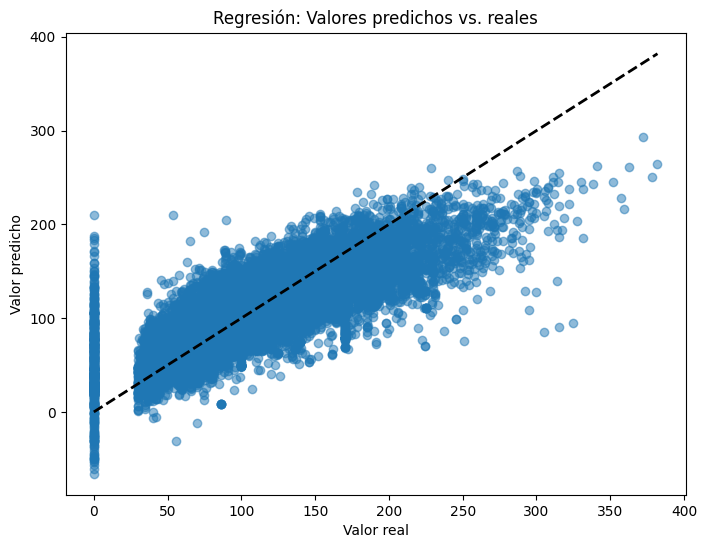

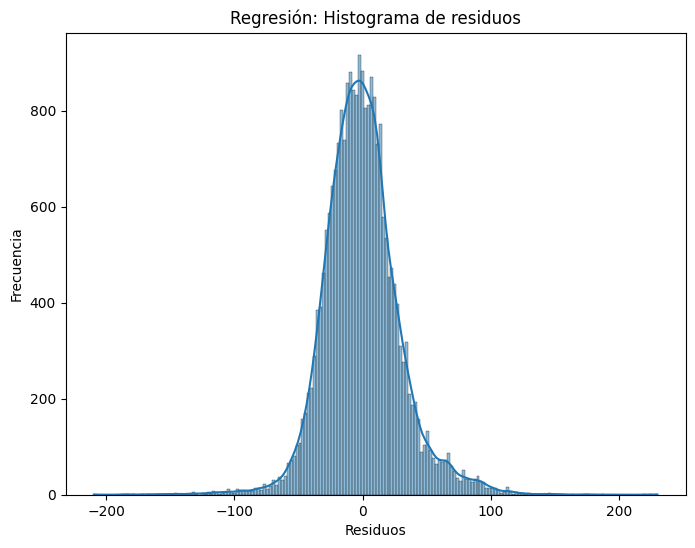

Regresión:
MSE: 884.3660677852059
R²: 0.6173017982664337


In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import numpy as np

# =====================================
# Visualización de métricas para el modelo de regresión
# =====================================

# Realizar predicciones usando el modelo de regresión
y_pred_reg = reg_model.predict(X_test) # Asignar a y_pred_reg

# Gráfico de dispersión de valores predichos vs. reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de referencia
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Regresión: Valores predichos vs. reales')
plt.show()

# Histograma de residuos
residuals = y_test - y_pred_reg
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True) # kde=True: agrega una curva de densidad suavizada (KDE = Kernel Density Estimation),
#que ayuda a ver la forma general de la distribución.
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Regresión: Histograma de residuos')
plt.show()

# Imprimir métricas
print("Regresión:")
print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("R²:", r2_score(y_test, y_pred_reg))


Para el modelo de clasificación binaria de cancelación de reserva, se puede usar un algoritmo de regresión logística o sigmoide.

In [161]:
# =====================================
# MODELO DE CLASIFICACIÓN BINARIA: Cancelación de reserva
# =====================================
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Importar StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Defina la variable objetivo correcta para la predicción de cancelación
y = df['is_canceled'] # Cambiado de df['adr'] a df['is_canceled']

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Se llama a train_test_split con la variable de destino corregida.

# Imputación de valores faltantes (NaN) usando SimpleImputer
imputer = SimpleImputer(strategy='mean')  # o 'mediana', 'más_frecuente', etc.
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Escalar los datos usando StandardScaler después de la imputación
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Cree y ajuste el modelo de regresión logística con un valor máximo de iteración aumentado
clf_bin1 = LogisticRegression(random_state=42, max_iter=1000) # Incremente max_iter
clf_bin1.fit(X_train, y_train) # El modelo se ajusta utilizando la variable objetivo correcta.
# Generar predicciones utilizando el modelo de regresión logística ajustado
y_pred_logistic = clf_bin1.predict(X_test) # Asignar a una nueva variable

#Ahora use el y_pred correcto para la evaluación
print("Accuracy:", accuracy_score(y_test, y_pred_logistic)) # Utilice y_pred_logistic
print(confusion_matrix(y_test, y_pred_logistic)) # Utilice y_pred_logistic
print(classification_report(y_test, y_pred_logistic)) # Utilice y_pred_logistic

Accuracy: 1.0
[[14958     0]
 [    0  8884]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14958
           1       1.00      1.00      1.00      8884

    accuracy                           1.00     23842
   macro avg       1.00      1.00      1.00     23842
weighted avg       1.00      1.00      1.00     23842



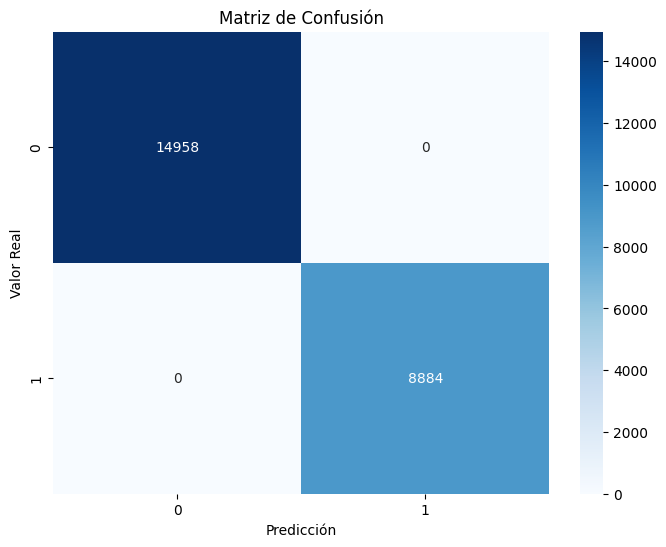

In [162]:
# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred_logistic)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()